Here, I try to convince myself that QR Decomposition is indeed the better algorithm for solving
least squares compared to using normal equations.

In [1]:
import numpy as np

I create an ill conditioned matrix A (small changes changes in input produces huge changes in output)
to test numerical stability of both algorithms

In [3]:
np.random.seed(0) # any integer value works as long the matrix is fixed
m,n = 200,10
A = np.random.randn(m,n)

# make an ill conditioned matrix A by making columns extremely tiny
for i in range(n):
    A[:,i] *= (10**i)

We're going to create a true solution $x$ and a noisy $b$.

In [7]:
# True solution
x_true = np.random.randn(n)

# create b with tiny noise
b = np.dot(A, x_true) + 1e-6 * np.random.randn(m)


Now we're going to compute using normal equations $A^{T}A\vec{x} = A^{T}\vec{b}$ and 
using $QR$ decomposition $R^{T}R\vec{x} = R^{T}Q^{T}\vec{b}$ 

In [8]:
# --- Normal equations ---
AtA = A.T @ A
Atb = A.T @ b
try:
    x_normal = np.linalg.solve(AtA, Atb)
except np.linalg.LinAlgError:
    # If AtA is singular or nearly singular, fall back to a least-squares / pseudo-inverse solve
    x_normal = np.linalg.lstsq(AtA, Atb, rcond=None)[0]

# --- QR ---
Q, R = np.linalg.qr(A)
x_qr = np.linalg.solve(R, Q.T @ b)

# --- Errors and condition numbers ---
err_normal = np.linalg.norm(x_normal - x_true)
err_qr = np.linalg.norm(x_qr - x_true)

cond_A = np.linalg.cond(A)
cond_AtA = np.linalg.cond(AtA)

print(f"Error (normal equations): {err_normal:.6g}")
print(f"Error (QR)           : {err_qr:.6g}")
print(f"cond(A)             : {cond_A:.6g}")
print(f"cond(A^T A)         : {cond_AtA:.6g}")
print(f"cond(A^T A) ~ cond(A)^2: {cond_A**2:.6g}")

Error (normal equations): 2.19028e-06
Error (QR)           : 2.82018e-08
cond(A)             : 9.53758e+08
cond(A^T A)         : 8.99004e+17
cond(A^T A) ~ cond(A)^2: 9.09655e+17


A is very ill-conditioned since $cond(A) \approx 9.5 \times 10^{8}$ 

$QR$ produced a solution 77.7 times more accurate than normal equations here

In [9]:
err_normal/err_qr

np.float64(77.6646548949823)

Now I want to look at how fitted the curve is for both QR and normal equations

Residual norm (normal): 5.00357e-05
Residual norm (qr)    : 1.41089e-05


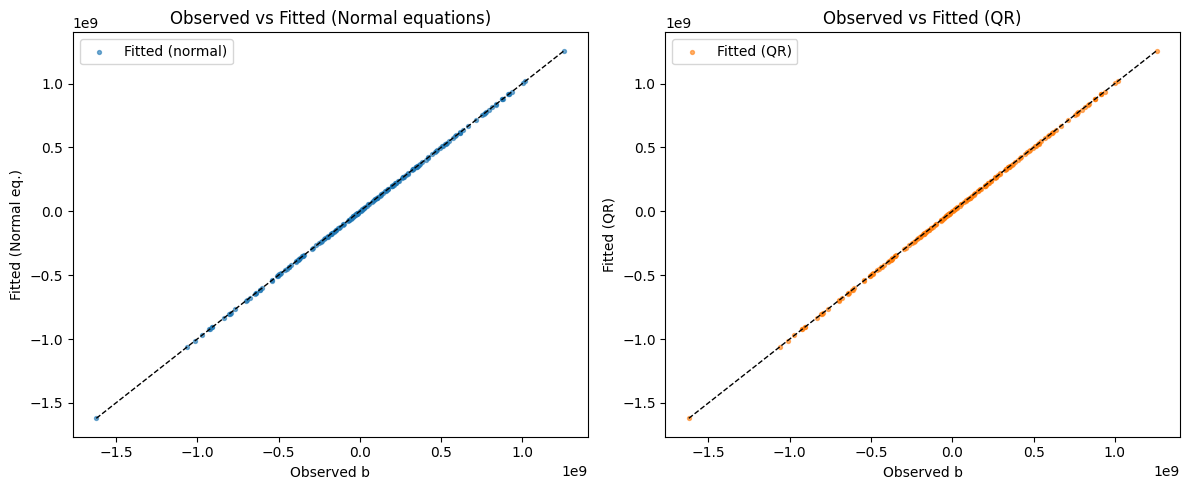

In [10]:
import matplotlib.pyplot as plt

# Fitted values from both methods
b_hat_normal = A @ x_normal
b_hat_qr = A @ x_qr

# Plot observed vs fitted for both methods
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(b, b_hat_normal, s=8, alpha=0.6, label='Fitted (normal)')
minv = min(b.min(), b_hat_normal.min())
maxv = max(b.max(), b_hat_normal.max())
plt.plot([minv, maxv], [minv, maxv], 'k--', lw=1)
plt.xlabel('Observed b')
plt.ylabel('Fitted (Normal eq.)')
plt.title('Observed vs Fitted (Normal equations)')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(b, b_hat_qr, s=8, alpha=0.6, color='C1', label='Fitted (QR)')
minv = min(b.min(), b_hat_qr.min())
maxv = max(b.max(), b_hat_qr.max())
plt.plot([minv, maxv], [minv, maxv], 'k--', lw=1)
plt.xlabel('Observed b')
plt.ylabel('Fitted (QR)')
plt.title('Observed vs Fitted (QR)')
plt.legend()

plt.tight_layout()

print(f'Residual norm (normal): {np.linalg.norm(b - b_hat_normal):.6g}')
print(f'Residual norm (qr)    : {np.linalg.norm(b - b_hat_qr):.6g}')

plt.show()

Here the residual norm for QR is less than the residual norm for normal equations, hence QR is the better
algorithm.